# **Laporan Proyek Machine Learning Terapan - Submission 1 _Predictive Analytics_**-
## Klasifikasi Metode Kontrasepsi
Laily Khoirunnisa' - MLT4

##**1. Import library** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import zipfile, os
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [3]:
!pip install -q kaggle
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


 ## **2. Data Loading**

In [4]:
!kaggle datasets download -d faizunnabi/contraceptive-method-choice

  0% 0.00/6.52k [00:00<?, ?B/s]
100% 6.52k/6.52k [00:00<00:00, 14.2MB/s]


In [5]:
# melakukan ekstraksi pada file zip
local_zip = 'contraceptive-method-choice.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## **3. Exploratory Data Analysis (EDA)**

In [6]:
df = pd.read_csv('/tmp/cmc.data.txt', names=['Usia Istri','Pend. Istri','Pend. Suami','Jumlah Anak', 'Agama Istri','Istri Bekerja','Pekerjaan Suami','Indeks Standar Hidup','Tekanan Media','Metode Kontrasepsi'])
df

,Usia Istri,Pend. Istri,Pend. Suami,Jumlah Anak,Agama Istri,Istri Bekerja,Pekerjaan Suami,Indeks Standar Hidup,Tekanan Media,Metode Kontrasepsi
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [7]:
df.describe()

,Usia Istri,Pend. Istri,Pend. Suami,Jumlah Anak,Agama Istri,Istri Bekerja,Pekerjaan Suami,Indeks Standar Hidup,Tekanan Media,Metode Kontrasepsi
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Usia Istri            1473 non-null   int64
 1   Pend. Istri           1473 non-null   int64
 2   Pend. Suami           1473 non-null   int64
 3   Jumlah Anak           1473 non-null   int64
 4   Agama Istri           1473 non-null   int64
 5   Istri Bekerja         1473 non-null   int64
 6   Pekerjaan Suami       1473 non-null   int64
 7   Indeks Standar Hidup  1473 non-null   int64
 8   Tekanan Media         1473 non-null   int64
 9   Metode Kontrasepsi    1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


**Menangani Missing Value (True=Ada Missing Value, False=Tidak ada Missing Value)**

In [9]:
print("Value kosong pada data :",df.isnull().values.any())

Value kosong pada data : False


**Menghapus duplikat data**

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1425, 10)

**Memeriksa Outlier Fitur Numerik**

<Axes: xlabel='Usia Istri'>

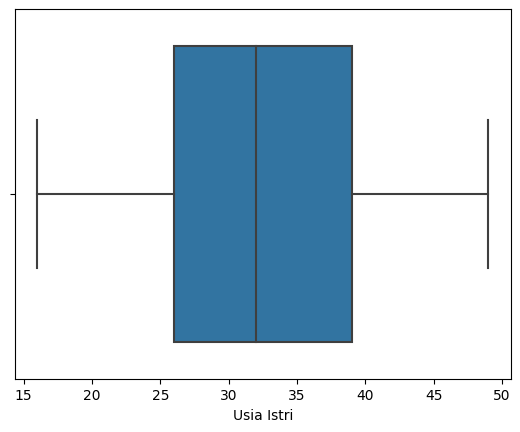

In [12]:
sns.boxplot(x=df['Usia Istri'])

<Axes: xlabel='Jumlah Anak'>

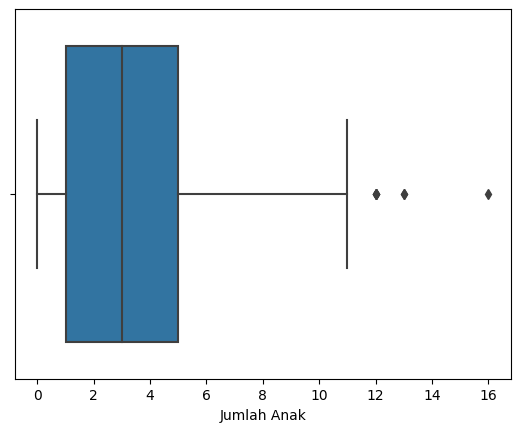

In [13]:
sns.boxplot(x=df['Jumlah Anak'])

Pengeluaran data outliers atau penggunaan data outliers tidak semata-mata merujuk kepada statistiknya, tetapi juga adjustment dari peneliti. Jika memang data outliers tersebut tidak dapat dikeluarkan karena masih merupakan fenomena subjek penelitian ya sebaiknya tetap dipergunakan. _(2015. Data Outliers. konsultasistatstik.com)_

Pada data numerik fitur `Jumlah Anak`, data outlier tidak terlalu banyak. Data yang muncul merupakan fenomena data yang wajar dan dapat terjadi pada keluarga tanpa kontrasepsi. 

**Mengatur tipe data kategorikal**

In [14]:
data_types_dict = {'Pend. Istri': str,'Pend. Suami': str,'Agama Istri': str,'Istri Bekerja': str,'Pekerjaan Suami': str,'Indeks Standar Hidup': str,'Tekanan Media': str,'Metode Kontrasepsi': str}
df = df.astype(data_types_dict)
df.dtypes

Usia Istri               int64
Pend. Istri             object
Pend. Suami             object
Jumlah Anak              int64
Agama Istri             object
Istri Bekerja           object
Pekerjaan Suami         object
Indeks Standar Hidup    object
Tekanan Media           object
Metode Kontrasepsi      object
dtype: object

In [15]:
num_features = ['Usia Istri', 'Jumlah Anak']
cat_features = ['Pend. Istri', 'Pend. Suami', 'Agama Istri', 'Istri Bekerja','Pekerjaan Suami','Indeks Standar Hidup','Tekanan Media','Metode Kontrasepsi']

   jumlah sampel  persentase
4            543        38.1
3            401        28.1
2            331        23.2
1            150        10.5


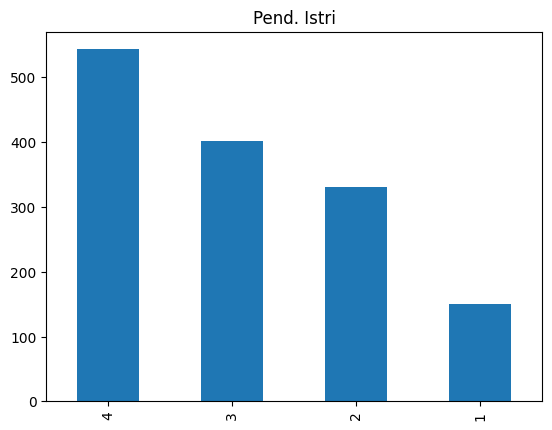

In [16]:
feature = cat_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Pend_Istri = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_Pend_Istri)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
4            858        60.2
3            347        24.4
2            176        12.4
1             44         3.1


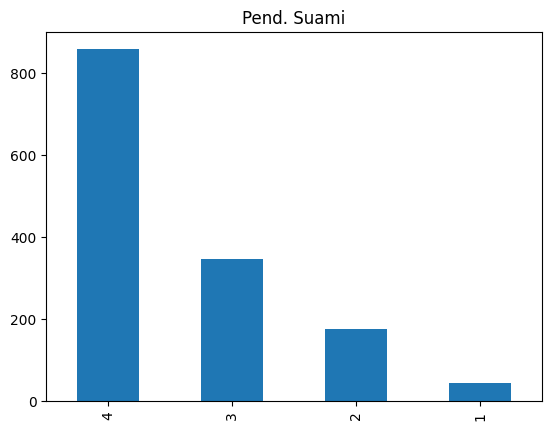

In [17]:
#Cat_feature : Pend. Suami
feature = cat_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Pend_Suami = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_Pend_Suami)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
1           1210        84.9
0            215        15.1


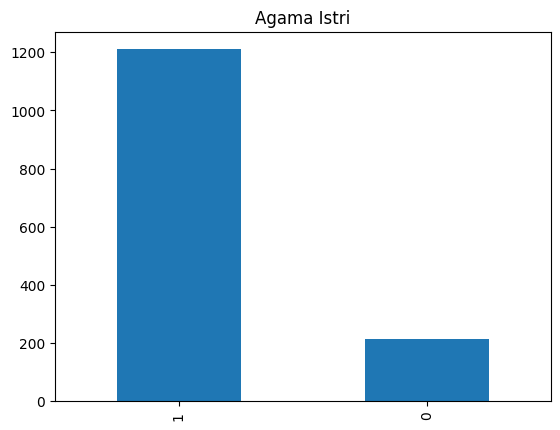

In [18]:
#Cat_feature : Agama Istri
feature = cat_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Agama = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_Agama)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
1           1065        74.7
0            360        25.3


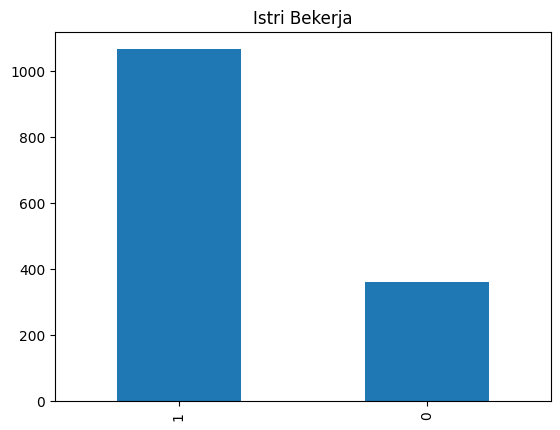

In [19]:
#Cat_feature : Istri Bekerja
feature = cat_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_bekerja = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_bekerja)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
3            575        40.4
2            420        29.5
1            403        28.3
4             27         1.9


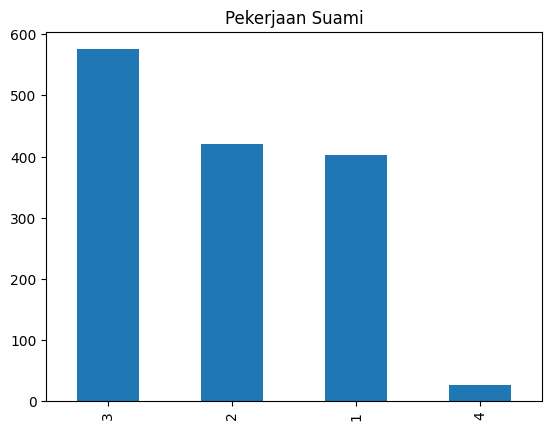

In [20]:
#Cat_feature : Pekerjaan Suami
feature = cat_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Pek_Suami = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_Pek_Suami)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
4            647        45.4
3            421        29.5
2            228        16.0
1            129         9.1


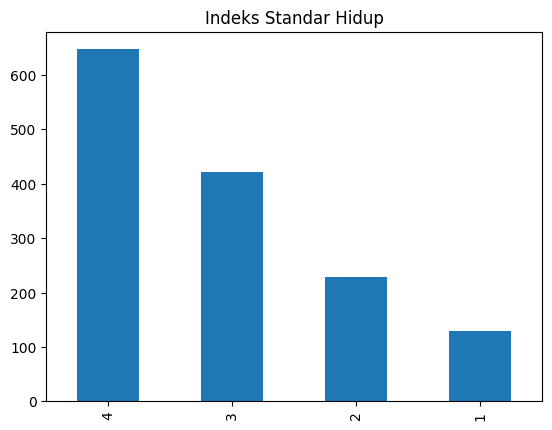

In [21]:
#Cat_feature : Indeks Standar Hidup
feature = cat_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_ish = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_ish)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0           1316        92.4
1            109         7.6


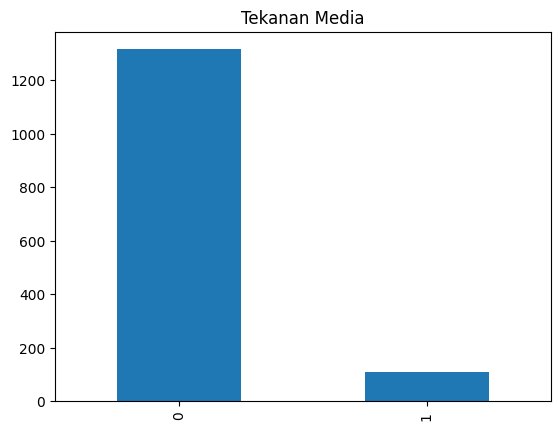

In [22]:
#Cat_feature : Tekanan Media
feature = cat_features[6]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_media = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_media)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
1            614        43.1
3            495        34.7
2            316        22.2


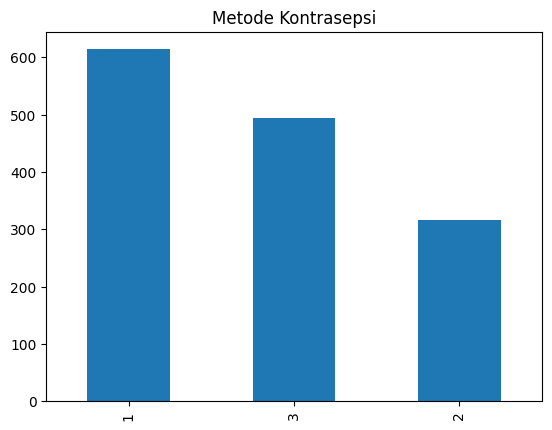

In [23]:
#Cat_feature : Metode Kontrasepsi
feature = cat_features[7]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_metode = pd.DataFrame({'jumlah sampel':count,'persentase':percent.round(1)})
print(df_metode)
count.plot(kind='bar', title=feature);

[None]

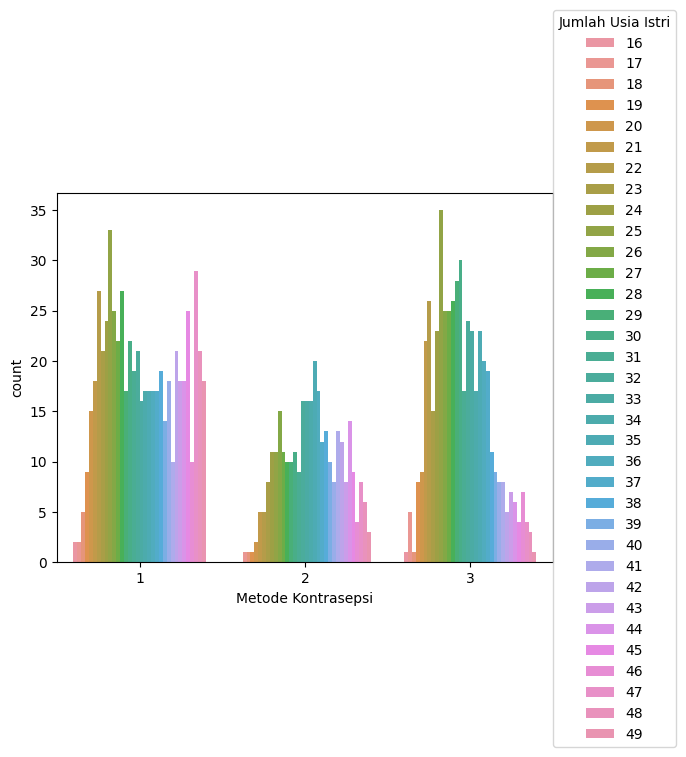

In [24]:
#Num_feature : Usia Istri
sns.countplot(x='Metode Kontrasepsi',data=df,hue="Usia Istri")
#place legend outside bottom right corner of plot
plt.legend(bbox_to_anchor=(1.00, -0.5), loc='lower left', borderaxespad=0).set(title="Jumlah Usia Istri")

[None]

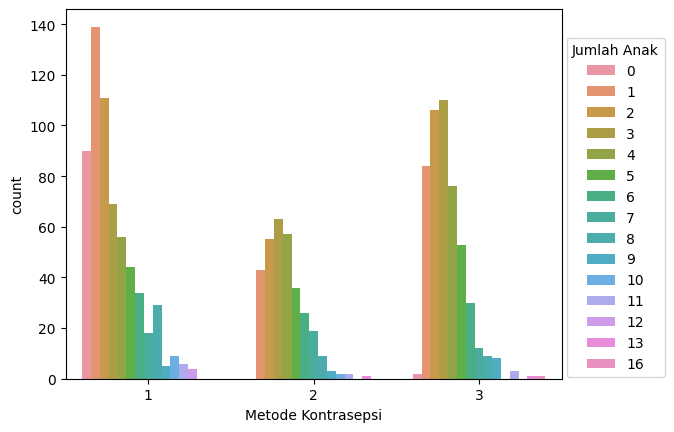

In [25]:
sns.countplot(x='Metode Kontrasepsi',data=df,hue="Jumlah Anak")
#place legend outside bottom right corner of plot
plt.legend(bbox_to_anchor=(1.01, 0.005), loc='lower left', borderaxespad=0).set(title="Jumlah Anak")

## **4. Exploratory Data Analysis - Multivariate Analysis**

Bar Charts for all Categorical Variables


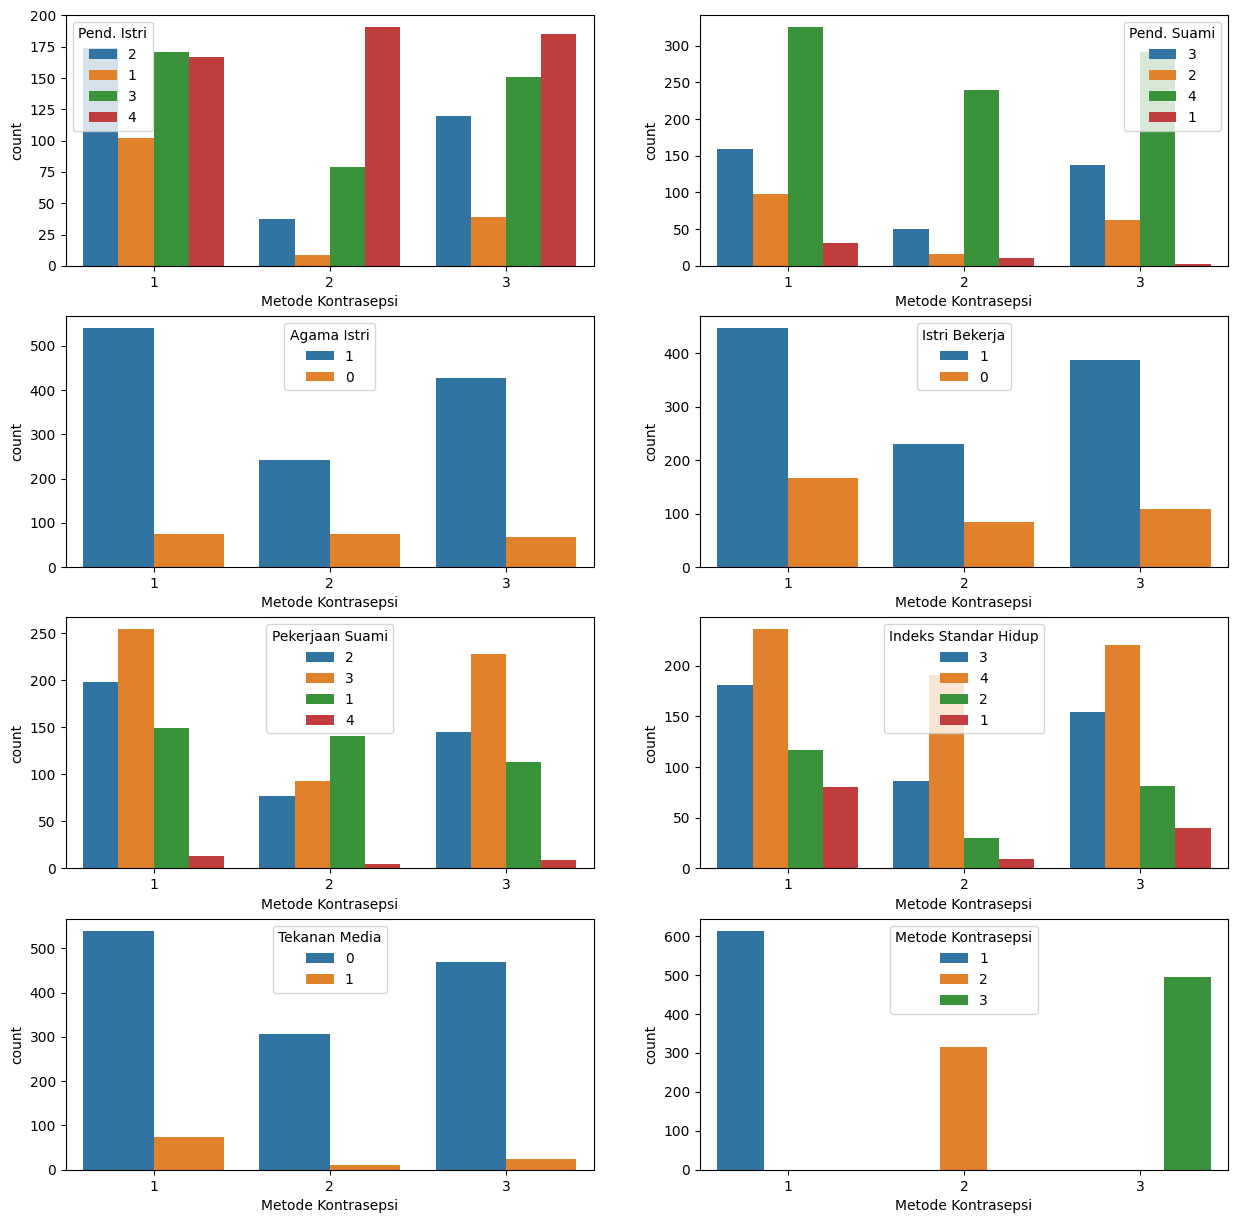

In [26]:
cat_features = df.select_dtypes(include='object')
cat_features = list(cat_features.columns)
cat_features_array = np.array(cat_features)
cat_features_array = np.reshape(cat_features_array, (4,2))

rows = 4 ; columns = 2
f, axes = plt.subplots(rows, columns, figsize=(15,15))
print ("Bar Charts for all Categorical Variables")
for row in range(rows):
    for column in range(columns):
      sns.countplot(x='Metode Kontrasepsi',data=df,hue=cat_features_array[row][column],ax=axes[row,column])

**Melihat korelasi matriks semua fitur**

Text(0.5, 1.0, 'Correlation Matrix Semua Fitur ')

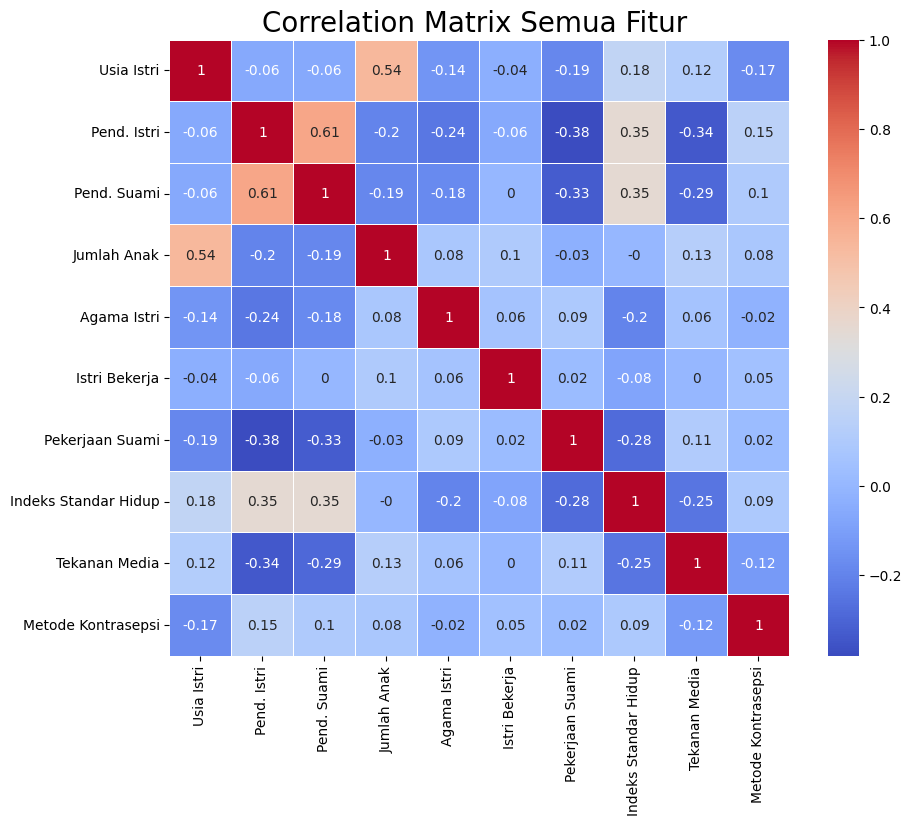

In [27]:
data_types_dict = {'Pend. Istri': int,'Pend. Suami': int,'Agama Istri': int,'Istri Bekerja': int,'Pekerjaan Suami': int,'Indeks Standar Hidup': int,'Tekanan Media': int,'Metode Kontrasepsi': int}
df = df.astype(data_types_dict)
df.dtypes

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix Semua Fitur ", size=20)

**Mengamati hubungan dalam bentuk fitur numerik**

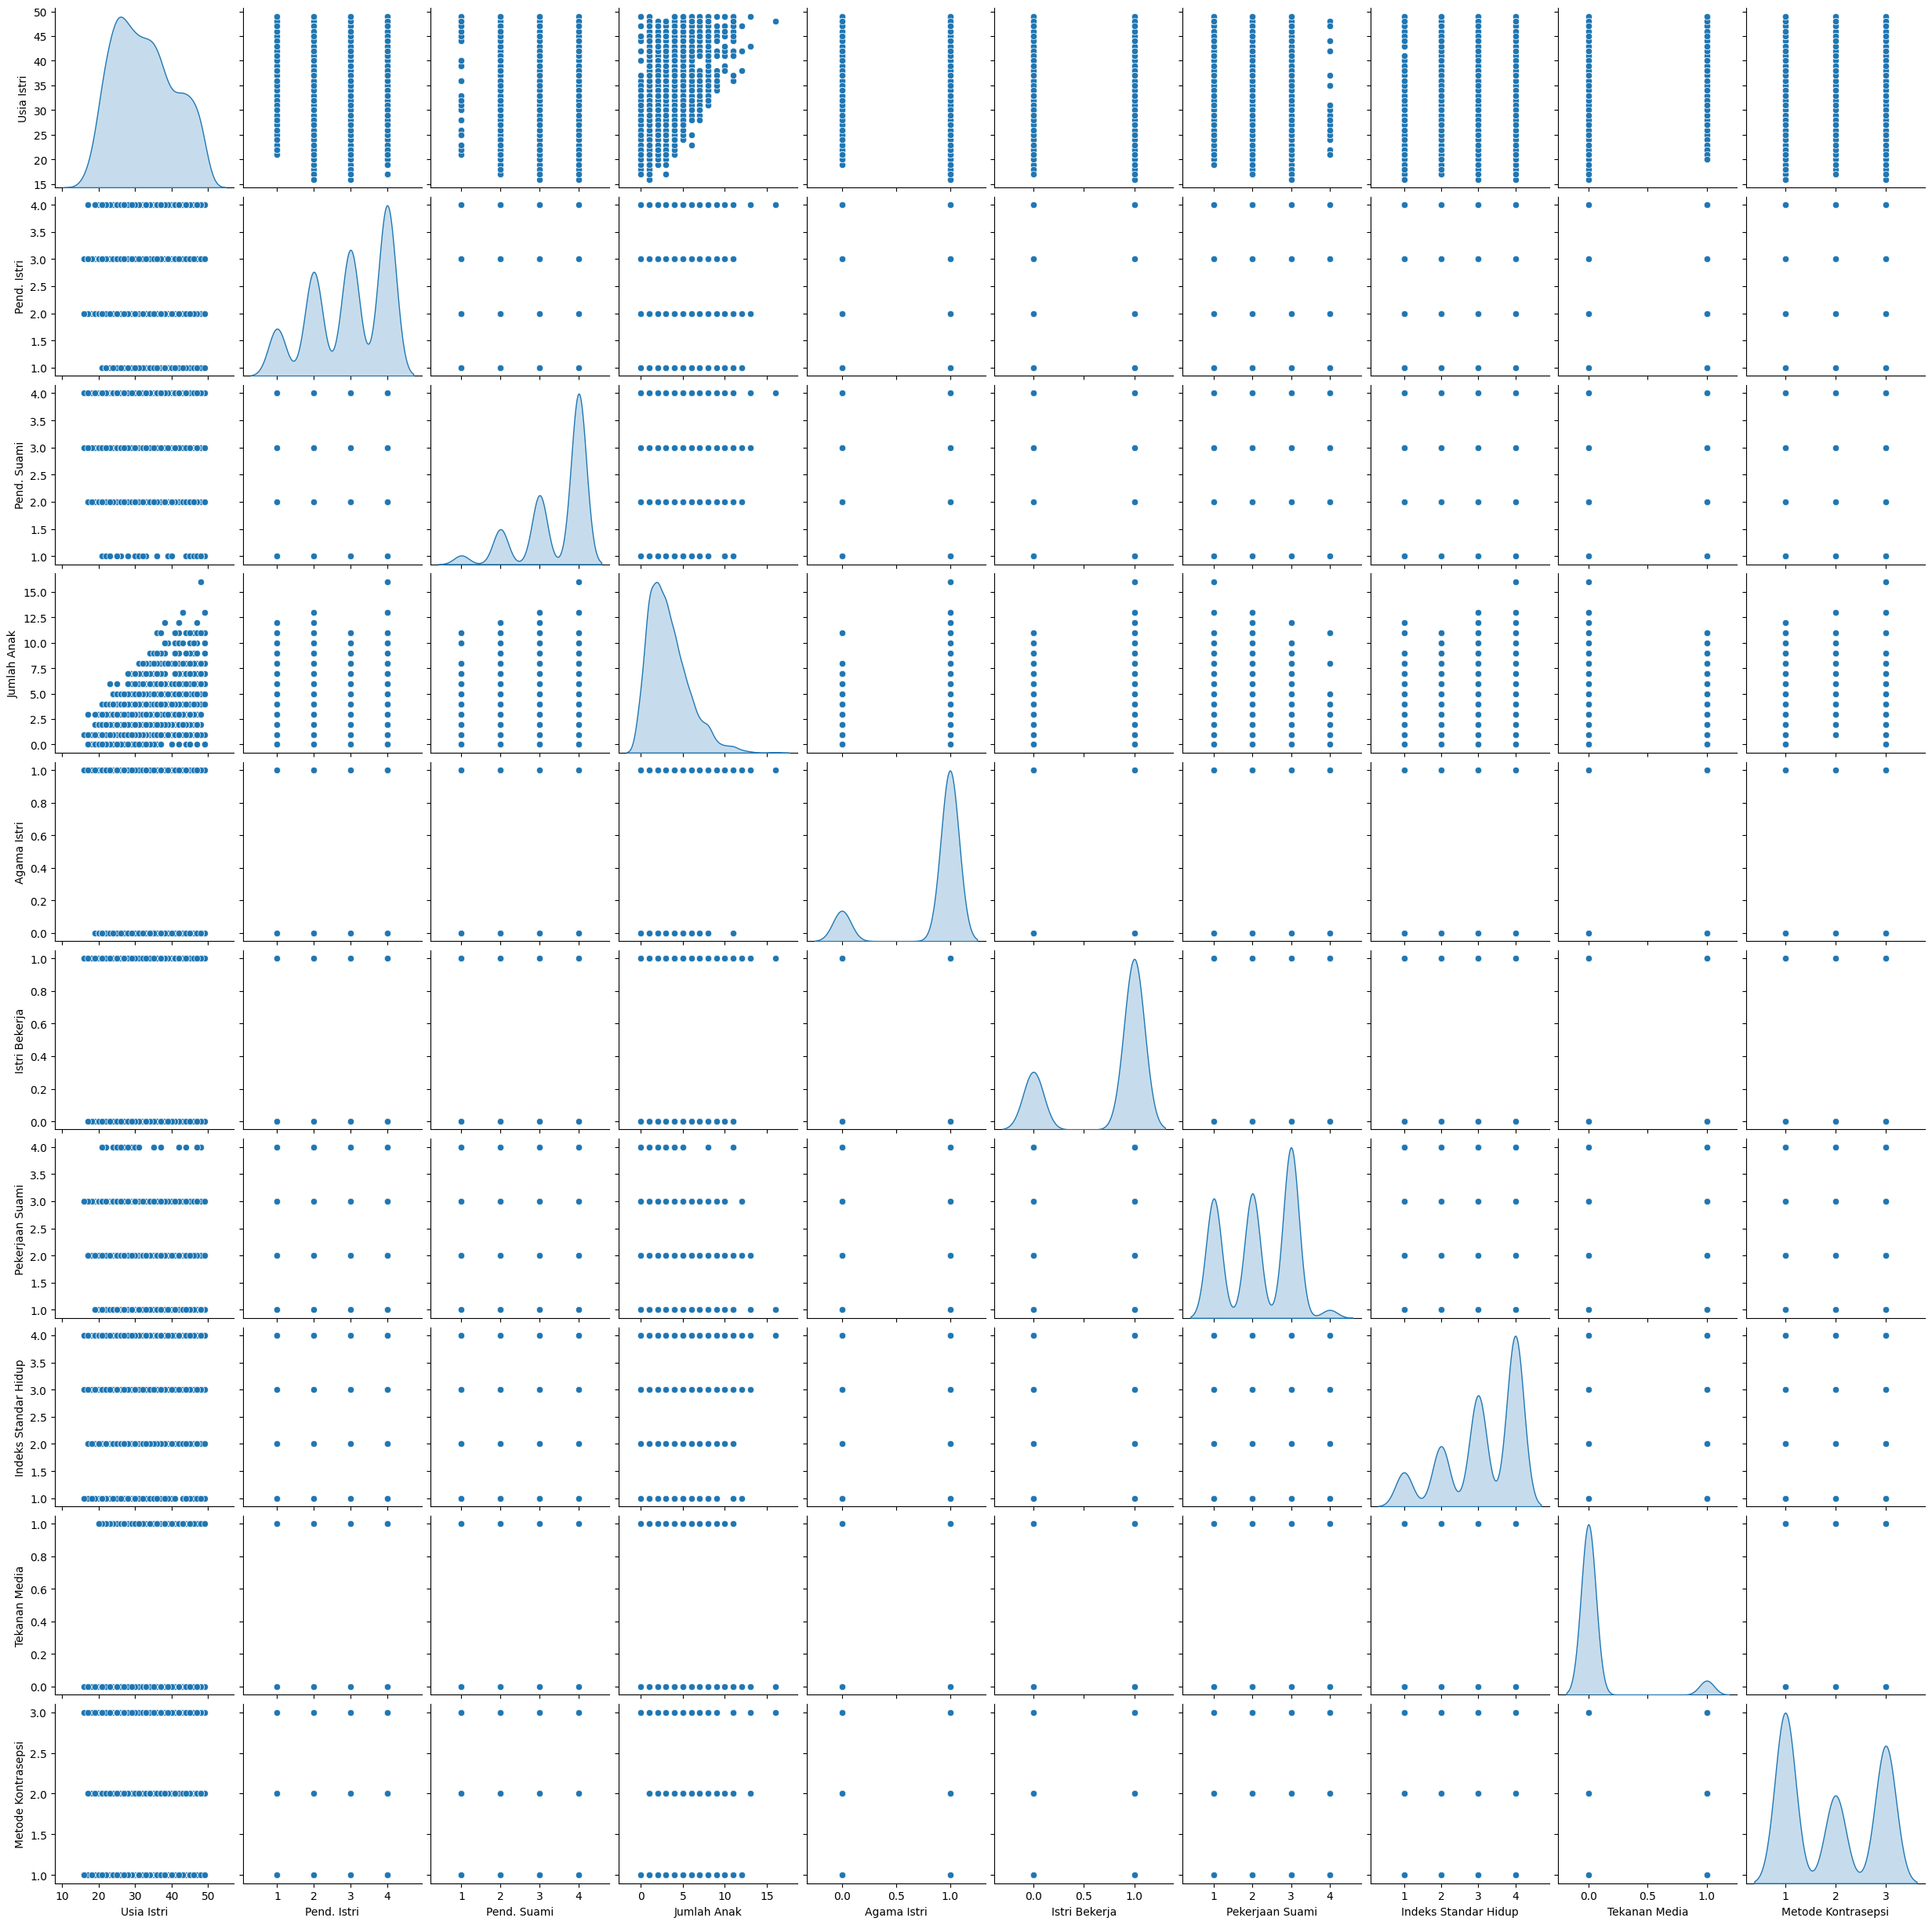

In [28]:
sns.pairplot(df, diag_kind = 'kde')

## **5. Data Preparation**

**Encoding fitur kategori** --> data sudah dalam bentuk numerik integer

**Reduksi fitur dari korelasi terendah** --> `Agama Istri` dan `Pekerjaan Suami`

In [130]:
df = df.drop(["Agama Istri"],axis =1)

In [131]:
df = df.drop(["Pekerjaan Suami"],axis =1)

In [132]:
df.head()

,Usia Istri,Pend. Istri,Pend. Suami,Jumlah Anak,Istri Bekerja,Indeks Standar Hidup,Tekanan Media,Metode Kontrasepsi
0,24,2,3,3,1,3,0,1
1,45,1,3,10,1,4,0,1
2,43,2,3,7,1,4,0,1
3,42,3,2,9,1,3,0,1
4,36,3,3,8,1,2,0,1


**Pembagian dataset**
Data yang akan diresampling SMOTE dan Tomek Links adalah data training.

In [29]:
X = df.drop(["Metode Kontrasepsi"],axis =1)
y = df["Metode Kontrasepsi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [30]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1425
Total # of sample in train dataset: 1140
Total # of sample in test dataset: 285


**Penerapan Standarisasi**

In [31]:
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train.loc[:, num_features])
X_test[num_features] = scaler.transform(X_test.loc[:, num_features])
X_train[num_features].head()

,Usia Istri,Jumlah Anak
21,-1.034683,-1.382549
289,0.307227,-1.382549
160,-1.156675,-0.128353
665,0.063243,1.961972
899,1.283161,0.707777


In [32]:
X_train[num_features].describe().round(4)

,Usia Istri,Jumlah Anak
count,1140.0000,1140.0000
mean,0.0000,0.0000
std,1.0004,1.0004
min,-2.0106,-1.3825
25%,-0.7907,-0.5464
50%,-0.0587,-0.1284
75%,0.7952,0.7078
max,2.0151,5.3065


### **Implementasi Smote, Tomek Link, dan Pipeline pada Model Decision Tree, Random Forest dan Ada Boost**


In [33]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(criterion='gini', max_depth=6,splitter='best')

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), dt)
SMOTETomek_dt = SMOTETomek_pipeline
SMOTETomek_dt.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6))])

In [34]:
y_pred_dt = SMOTETomek_dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.72      0.38      0.50       120
           2       0.36      0.63      0.46        73
           3       0.46      0.47      0.46        92

    accuracy                           0.47       285
   macro avg       0.51      0.49      0.47       285
weighted avg       0.54      0.47      0.48       285



In [35]:
#ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt, pos_label=3)
metrics.auc(fpr, tpr)

0.6307163775625141

In [36]:
kf = StratifiedKFold(n_splits=5, shuffle=False)
params = {
    'criterion': ['gini'],
    'max_depth': [2, 6, 10, 12, 15],
    'splitter': ['best']
}

grid_dt = GridSearchCV(dt, param_grid=params, cv=kf).fit(X_train, y_train)

In [37]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [38]:
grid_dt_predictions = grid_dt.predict(X_test)
print(classification_report(y_test,grid_dt_predictions))

              precision    recall  f1-score   support

           1       0.66      0.69      0.67       120
           2       0.54      0.42      0.48        73
           3       0.50      0.55      0.53        92

    accuracy                           0.58       285
   macro avg       0.57      0.56      0.56       285
weighted avg       0.58      0.58      0.58       285



In [39]:
#ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, grid_dt_predictions, pos_label=3)
metrics.auc(fpr, tpr)

0.6410790718630324

In [40]:
rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), rf)
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=16, n_estimators=50,
                                        n_jobs=-1, random_state=55))])

In [41]:
y_pred = SMOTETomek_rf.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.65      0.57      0.60       120
           2       0.37      0.37      0.37        73
           3       0.42      0.49      0.45        92

    accuracy                           0.49       285
   macro avg       0.48      0.48      0.48       285
weighted avg       0.50      0.49      0.50       285



In [43]:
#ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=3)
metrics.auc(fpr, tpr)

0.612637981527371

In [44]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13,30,50,55,100]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf).fit(X_train, y_train)

In [45]:
grid_rf.best_params_

{'max_depth': 6, 'n_estimators': 50, 'random_state': 55}

In [46]:
grid_rf_predictions = grid_rf.predict(X_test)
print(classification_report(y_test,grid_rf_predictions))

              precision    recall  f1-score   support

           1       0.64      0.62      0.63       120
           2       0.54      0.29      0.38        73
           3       0.45      0.63      0.52        92

    accuracy                           0.54       285
   macro avg       0.54      0.51      0.51       285
weighted avg       0.55      0.54      0.53       285



In [47]:
#ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test,grid_rf_predictions, pos_label=3)
metrics.auc(fpr, tpr)

0.6378688893895021

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(learning_rate=0.05, random_state=50)
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), ab)
SMOTETomek_AB = SMOTETomek_pipeline
SMOTETomek_AB.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.05, random_state=50))])

In [52]:
y_pred_AB = SMOTETomek_AB.predict(X_test)
print(classification_report(y_test,y_pred_AB))

              precision    recall  f1-score   support

           1       0.83      0.33      0.48       120
           2       0.38      0.59      0.46        73
           3       0.43      0.58      0.49        92

    accuracy                           0.48       285
   macro avg       0.55      0.50      0.48       285
weighted avg       0.59      0.48      0.48       285



In [50]:
#ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_AB, pos_label=3)
metrics.auc(fpr, tpr)

0.6586505969813021

In [53]:
params_ab = {
    'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1],
    'random_state': [5,10,13,15,20,30,50]
}

grid_ab = GridSearchCV(ab, param_grid=params_ab, cv=kf).fit(X_train, y_train)

In [54]:
grid_ab.best_params_

{'learning_rate': 0.1, 'random_state': 5}

In [55]:
grid_ab_predictions = grid_ab.predict(X_test)
print(classification_report(y_test,grid_ab_predictions))

              precision    recall  f1-score   support

           1       0.64      0.68      0.66       120
           2       0.47      0.21      0.29        73
           3       0.44      0.61      0.51        92

    accuracy                           0.53       285
   macro avg       0.52      0.50      0.49       285
weighted avg       0.53      0.53      0.52       285



In [56]:
#ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, grid_ab_predictions, pos_label=3)
metrics.auc(fpr, tpr)

0.6280130660058573